In [1]:
#Se llaman a las librerías
import pandas as pd
import numpy as np
import matplotlib as plt

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
#client_f68196969c7242d0b79d06af57c8e349 = ibm_boto3.client(service_name='s3',
 #   ibm_api_key_id='3UDpojPHU4zPeok_oiS11zaupnkGIF5Zy5IopIP8gwTQ',
 #  ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
 #   config=Config(signature_version='oauth'),
 #   endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

#body = client_f68196969c7242d0b79d06af57c8e349.get_object(Bucket='proyectoutec051019-donotdelete-pr-pabaanjygdnerg',Key='utec_muestra (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_train = pd.read_csv("utec_muestra.csv")
data_train.head()


C:\Users\FREDDY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (85,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MES_ID,CLIENTE_ID,FLG_EVENTO_SPT,FLG_EVENTO_SRE,FLGCLIENTENEGATIVO,IMP_INGRESOEST,STR_MACROZONALIMA,STR_PROVINCIA,NUM_EDAD,IMP_RENTABILIDAD_MED,...,GRP_SERV_HIGIENICOS_MAX,GRP_ENERGIA_MAX,IND_DENSI_BANC_DECIL,IND_PAXS_CTS,IND_PAUP_DAP,IND_PAFG_TC,IND_PAXS_EP,COD_ACTECONOMICA,COD_DEPARTAMENTO,COD_PROFESION
0,201608,1661,1,0,N,4778.94,LC,M7,43,24.056667,...,red,energia_2,1,1,0,0,0,99,30,900
1,201608,2194,0,0,N,7868.34,LN,M7,47,415.228333,...,red,energia_2,0,0,0,0,0,7511,30,100
2,201608,2434,0,0,N,12543.64,.,D3,56,588.841667,...,red,energia_2,0,1,0,0,0,91,8,0
3,201608,2473,0,0,N,2188.42,.,F3,37,474.696667,...,red,energia_2,0,1,0,0,1,4520,12,900
4,201608,3754,0,0,N,1243.65,LM,M7,69,47.646667,...,red,energia_2,0,1,0,1,1,4530,30,412


In [2]:
#Obtener número de registros y columnas
print(data_train.shape)

#Tasa a predecir para SPT
print(data_train.FLG_EVENTO_SPT.sum()/data_train.shape[0])

#Tasa a predecir para SRE
print(data_train.FLG_EVENTO_SRE.sum()/data_train.shape[0])

print("La tasa actual para SPT es de 7.29% y para SRE es de 0.46%")

(208473, 97)
0.07287754289524304
0.004624100003357749
La tasa actual para SPT es de 7.29% y para SRE es de 0.46%


In [3]:
data_train.head()

,MES_ID,CLIENTE_ID,FLG_EVENTO_SPT,FLG_EVENTO_SRE,FLGCLIENTENEGATIVO,IMP_INGRESOEST,STR_MACROZONALIMA,STR_PROVINCIA,NUM_EDAD,IMP_RENTABILIDAD_MED,...,GRP_SERV_HIGIENICOS_MAX,GRP_ENERGIA_MAX,IND_DENSI_BANC_DECIL,IND_PAXS_CTS,IND_PAUP_DAP,IND_PAFG_TC,IND_PAXS_EP,COD_ACTECONOMICA,COD_DEPARTAMENTO,COD_PROFESION
0,201608,1661,1,0,N,4778.94,LC,M7,43,24.056667,...,red,energia_2,1,1,0,0,0,99,30,900
1,201608,2194,0,0,N,7868.34,LN,M7,47,415.228333,...,red,energia_2,0,0,0,0,0,7511,30,100
2,201608,2434,0,0,N,12543.64,.,D3,56,588.841667,...,red,energia_2,0,1,0,0,0,91,8,0
3,201608,2473,0,0,N,2188.42,.,F3,37,474.696667,...,red,energia_2,0,1,0,0,1,4520,12,900
4,201608,3754,0,0,N,1243.65,LM,M7,69,47.646667,...,red,energia_2,0,1,0,1,1,4530,30,412


In [4]:
#Llamo a las librerías
import pandas as pd
import numpy as np
import matplotlib

#Imprimo las columnas
print(data_train.columns)

Index(['MES_ID', 'CLIENTE_ID', 'FLG_EVENTO_SPT', 'FLG_EVENTO_SRE',
       'FLGCLIENTENEGATIVO', 'IMP_INGRESOEST', 'STR_MACROZONALIMA',
       'STR_PROVINCIA', 'NUM_EDAD', 'IMP_RENTABILIDAD_MED',
       'IMP_OPEHAB_CVIS_MED', 'NUM_OPEHAB_CVIS_MED', 'NUM_OPEDEB_CVIS_MED',
       'IMP_MED_CAH_MED', 'IMP_MED_CVIS_TEND', 'IND_CANCREC_CCT',
       'NUM_MES_APEANT_CSU_LN', 'NUM_MES_CANCREC_CVIS_LN',
       'IMP_INTANG_SOL_CTS', 'IMP_CTS', 'NUM_MES_APEANT_CTS_LN',
       'NUM_MES_CIEREC_CTS_LN', 'IMP_INTANG_SOL_CTS_MED_EVOL',
       'PCT_IMP_TANG_CTS_MED', 'IMP_NORED_SOL_DAP_MED_EVOL',
       'IMP_NORED_DOL_DAP_TEND', 'IMP_DEUDA_PPE_TEND', 'NUM_MES_APEANT_PPE_LN',
       'IMP_DEUDAINI_HIP_MED', 'IND_HIP', 'IMP_OPE_BT_MED_EVOL',
       'PCT_IMP_OTR_BT_MED', 'IMP_OPE_SOL_EP_MED', 'PCT_OPE_SOL_EP_MED',
       'IMP_PASIVO_ACTUAL', 'IMP_DEUDA_TC', 'IMP_AMORT_TC', 'NUM_TC',
       'NUM_MESES_APER_TC', 'IMP_OPE_TC_MED', 'IMP_DISPONIBLE_TC_MED',
       'IMP_DISPONIBLE_TC_MED_EVOL', 'IMP_LIMITE_TC_MED_

In [5]:
data_train.groupby('FLG_EVENTO_SPT').FLG_EVENTO_SPT.count()

FLG_EVENTO_SPT
0    193280
1     15193
Name: FLG_EVENTO_SPT, dtype: int64

In [8]:
#Seleccionando las columnas a eliminar, son columnas univalor o ID, además de STR_PROVINCIA porque dos provincias representan el 65% del universo
cols_borrar= ['STR_PROVINCIA','CLIENTE_ID','FLGCLIENTENEGATIVO', 'IMP_NORED_SOL_DAP_MED_EVOL',  'IMP_NORED_DOL_DAP_TEND', 'NUM_MES_ULT_PRESTAMO','NUM_RECLAMOS_6M_SEG_OTROS','IND_RECLAMOS','IMP_UTILITIES_LUZ_MED','IMP_LIFES_EDUC_MED','IND_CAMP_SOLI_PROD_SEGUROS']

In [9]:
#Eliminando las columnas elegidas
data_train = data_train.drop(cols_borrar,1)

In [10]:
print(data_train.shape)

(208473, 86)


In [11]:
#92% de 0 y 8% de 1 -- el dataset está desbalanceado
data_train.groupby('FLG_EVENTO_SPT').FLG_EVENTO_SPT.count()

FLG_EVENTO_SPT
0    193280
1     15193
Name: FLG_EVENTO_SPT, dtype: int64

In [12]:
#Imputar los datos

import pandas as pd
import numpy as np

#1- variable: GRP_ENERGIA_MAX --> El valor energia_2 es el de mayor frecuencia por lo que se colocará ese
#2- variable: GRP_SERV_HIGIENICOS_MAX
#3- variable: GRP_TIPO_VIVIENDA_MAX

#Base TRAIN
data_train['GRP_ENERGIA_MAX'].fillna('energia_2', inplace=True)
data_train['GRP_SERV_HIGIENICOS_MAX'].fillna('red', inplace=True)
data_train['GRP_TIPO_VIVIENDA_MAX'].fillna('tipoviv_01', inplace=True)

In [13]:
import pandas as pd
import numpy as np

In [14]:
#TRAIN
data_train['STR_MACROZONALIMA'] = data_train['STR_MACROZONALIMA'].map({'.': 'MACROZONA_NA', 'CA': 'MACROZONA_CA', 'LC':'MACROZONA_LC','LE':'MACROZONA_LE', 'LM':'MACROZONA_LM', 'LN':'MACROZONA_LN', 'LS':'MACROZONA_LS'})

In [15]:
#TRAIN
data_train['GRP_SERV_HIGIENICOS_MAX'] = data_train['GRP_SERV_HIGIENICOS_MAX'].map({'no_tiene': 'SSHH_NOTIENE', 'pozo': 'SSHH_POZO', 'red':'SSHH_RED'})

In [16]:
#Transformaremos en columnas las variables de GRP_SERV_HIGIENICOS_MAX y STR_MACROZONALIMA
import pandas as pd
data_train_1 = pd.get_dummies(data_train["GRP_SERV_HIGIENICOS_MAX"])
data_train_2 = pd.get_dummies(data_train["STR_MACROZONALIMA"])
data_train_3 = pd.get_dummies(data_train["GRP_ENERGIA_MAX"])
data_train_4 = pd.get_dummies(data_train["GRP_TIPO_VIVIENDA_MAX"])

data_train = pd.concat([data_train, data_train_1, data_train_2, data_train_3, data_train_4], axis = 1)
data_train.head()

,MES_ID,FLG_EVENTO_SPT,FLG_EVENTO_SRE,IMP_INGRESOEST,STR_MACROZONALIMA,NUM_EDAD,IMP_RENTABILIDAD_MED,IMP_OPEHAB_CVIS_MED,NUM_OPEHAB_CVIS_MED,NUM_OPEDEB_CVIS_MED,...,energia_5,energia_8,tipoviv_01,tipoviv_02,tipoviv_03,tipoviv_04,tipoviv_06,tipoviv_07,tipoviv_08,tipoviv_09
0,201608,1,0,4778.94,MACROZONA_LC,43,24.056667,15494.808330,3.333333,11.833333,...,0,0,1,0,0,0,0,0,0,0
1,201608,0,0,7868.34,MACROZONA_LN,47,415.228333,12641.183330,3.000000,16.666667,...,0,0,1,0,0,0,0,0,0,0
2,201608,0,0,12543.64,MACROZONA_NA,56,588.841667,10200.220000,2.166667,6.166667,...,0,0,1,0,0,0,0,0,0,0
3,201608,0,0,2188.42,MACROZONA_NA,37,474.696667,2811.370000,2.500000,12.000000,...,0,0,1,0,0,0,0,0,0,0
4,201608,0,0,1243.65,MACROZONA_LM,69,47.646667,710.921667,1.833333,4.000000,...,0,0,0,1,0,0,0,0,0,0


In [17]:
#Seleccionando las columnas a eliminar, son columnas univalor o ID, además de STR_PROVINCIA porque dos provincias representan el 65% del universo
cols_borrar2= ['STR_MACROZONALIMA','GRP_SERV_HIGIENICOS_MAX','GRP_ENERGIA_MAX','GRP_TIPO_VIVIENDA_MAX']
data_train = data_train.drop(cols_borrar2,1)

In [18]:
print(data_train.columns)

Index(['MES_ID', 'FLG_EVENTO_SPT', 'FLG_EVENTO_SRE', 'IMP_INGRESOEST',
       'NUM_EDAD', 'IMP_RENTABILIDAD_MED', 'IMP_OPEHAB_CVIS_MED',
       'NUM_OPEHAB_CVIS_MED', 'NUM_OPEDEB_CVIS_MED', 'IMP_MED_CAH_MED',
       ...
       'energia_5', 'energia_8', 'tipoviv_01', 'tipoviv_02', 'tipoviv_03',
       'tipoviv_04', 'tipoviv_06', 'tipoviv_07', 'tipoviv_08', 'tipoviv_09'],
      dtype='object', length=106)


In [19]:
data_train.head()

,MES_ID,FLG_EVENTO_SPT,FLG_EVENTO_SRE,IMP_INGRESOEST,NUM_EDAD,IMP_RENTABILIDAD_MED,IMP_OPEHAB_CVIS_MED,NUM_OPEHAB_CVIS_MED,NUM_OPEDEB_CVIS_MED,IMP_MED_CAH_MED,...,energia_5,energia_8,tipoviv_01,tipoviv_02,tipoviv_03,tipoviv_04,tipoviv_06,tipoviv_07,tipoviv_08,tipoviv_09
0,201608,1,0,4778.94,43,24.056667,15494.808330,3.333333,11.833333,5558.913333,...,0,0,1,0,0,0,0,0,0,0
1,201608,0,0,7868.34,47,415.228333,12641.183330,3.000000,16.666667,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,201608,0,0,12543.64,56,588.841667,10200.220000,2.166667,6.166667,0.000000,...,0,0,1,0,0,0,0,0,0,0
3,201608,0,0,2188.42,37,474.696667,2811.370000,2.500000,12.000000,115.311667,...,0,0,1,0,0,0,0,0,0,0
4,201608,0,0,1243.65,69,47.646667,710.921667,1.833333,4.000000,844.641667,...,0,0,0,1,0,0,0,0,0,0


In [89]:
Y = data_train.FLG_EVENTO_SPT
X = data_train.drop(['FLG_EVENTO_SPT','FLG_EVENTO_SRE'],1)

In [90]:
#Llamo la librería para partir la base en train y test (80 y 20 respectivamente)
from sklearn.model_selection import train_test_split

In [91]:
#SPT_TRAIN, SPT_TEST = train_test_split(data_train, train_size = 0.8, random_state= 10)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=10)

In [92]:
X_train.shape

(166778, 104)

In [103]:
X_test.shape

(41695, 104)

In [94]:
Y_train.shape

(166778,)

In [95]:
Y_valid.shape

(41695,)

In [99]:
#!pip install imblearn
#from imblearn.over_sampling import SMOTE

In [135]:
smote = SMOTE('minority')

In [136]:
X_train_sm, Y_train_sm = smote.fit_sample(X_train, Y_train)

In [137]:
print(X_train_sm.shape)
print(Y_train_sm.shape)

(309276, 104)
(309276,)


In [138]:
X_test_sm, Y_test_sm = smote.fit_sample(X_test, Y_test)

In [139]:
print(X_test_sm.shape)
print(Y_test_sm.shape)

(77284, 104)
(77284,)


In [122]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
Y_train_log = Y_train_sm

In [159]:
#Generamos un árbol por default para evaluar su comportamiento
clf = DecisionTreeClassifier(criterion="gini", max_depth =6)
clf.fit(X_train_sm, Y_train_sm) #Dataset, target

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [160]:
Y_test_pred = clf.predict_proba(X_test_sm)[:,1]
Y_test_log = Y_test_sm

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test_log, Y_test_pred)
roc_auc = auc(fpr, tpr)

In [161]:
roc_auc

0.8895553515212404

In [162]:
#accuracy
clf.score(X_train, Y_train)

0.8169242945712264

In [163]:
y_pred_clf1 = clf.predict(X_test_sm)

In [167]:
#Matriz de confusión
pd.crosstab(Y_test_log, y_pred_clf1
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,33473,5169
1,8971,29671


In [170]:
from sklearn import metrics

#Obtenemos el AUC y el Gini
fpr, tpr, thresholds = metrics.roc_curve(Y_test_sm, Y_test_pred)
auc_mod_test = metrics.auc(fpr, tpr)

print("El AUC de test es "+str(auc_mod_test))
print("El Gini de test es "+str(2.*auc_mod_test-1))


#Valor AUC	Referencia
#0.5-0.7	Aceptable
#0.7-0.9	Bueno
#Más de 0.9	Revisar, no es común llegar a este valor

El AUC de test es 0.8895553515212404
El Gini de test es 0.7791107030424809


In [148]:
#Gráfico AUC vs Cantidad de nodos

import matplotlib.pyplot as plt 

train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 23))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='gini', max_depth=deep)
    arbol3.fit(X_train_sm, Y_train_sm)
    
    Y_train_pred = arbol3.predict_proba(X_train_sm)[:,1]
    #Y_train_log = Y_train.FLG_EVENTO_SPT
    
    Y_test_pred = arbol3.predict_proba(X_test_sm)[:,1]
    #Y_test_log = Y_test.FLG_EVENTO_SPT
    
    fpr, tpr, thresholds = roc_curve(Y_test_sm, Y_test_pred)
    eval_prec.append(auc(fpr, tpr))
    
    fpr2, tpr2, thresholds2 = roc_curve(Y_train_sm, Y_train_pred)
    train_prec.append(auc(fpr2, tpr2))
    
    
    
   # train_prec.append(arbol3.score(X_train, Y_train))
    #eval_prec.append(arbol3.score(X_test, Y_test))

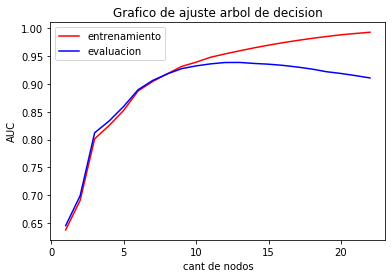

In [149]:
# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('AUC')
plt.xlabel('cant de nodos')
plt.show()

Se realiza una regresión logística

In [171]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

In [173]:
logreg.fit(X_train_sm, Y_train_sm)

C:\Users\FREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
y_pred_clf2 = logreg.predict(X_test_sm)

In [176]:
pd.crosstab(Y_test_sm,y_pred_clf2
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,26404,12238
1,21774,16868


In [ ]:
############################################################################################################################################################
#EVALUACION

In [ ]:
#Creo una dataframe, juntando las variables X con la variable real Y
#ordenado = X_test.merge(pd.DataFrame(Y_test), left_index=True , right_index=True)

# Pego al DF la predicción, así como algunas variables que necesitaré después
#ordenado = ordenado.merge(pd.DataFrame(Y_test_pred), left_index=True , right_index=True)

#print(ordenado.shape)

In [ ]:
#ordenado.head()

In [ ]:
#Luego procedo a ordenar por probabilidad
#ordenado = ordenado.sort_values(by=['Y_test_pred'], ascending=False)

In [ ]:
## Para crear los quintiles, vamos a usar un camino auxiliar, para que cada quintil tenga exactamente la misma cantidad
## de observaciones. Esto puede suceder si hay empates en probabilidades.

#Creo columna con un orden establecido "aleatorio"
#ordenado.insert(0, 'orden', range(1, 1 + len(ordenado)))

#Creo el quintil basado en la variable auxiliar orden 
#ordenado['quintil'] = pd.qcut(ordenado['orden'], 5, labels=False)
#ordenado.head()

In [ ]:
#ordenado =  ordenado.fillna(0)

#cols_interes= ['Y_test_pred','quintil']

#ordenado[cols_interes].groupby('quintil').agg(['mean', 'count', 'sum'])

In [ ]:
#ordenado[cols_interes].agg(['mean', 'count', 'sum'])

In [ ]:
#c1= ordenado[cols_interes].agg(['mean', 'count', 'sum'])
#c1.to_csv("output_SPT_QUINTILES.csv")

#exportemos este resultado:
#to_exp = ordenado[cols_interes].groupby('quintil').agg(['mean', 'count', 'sum'])
#to_exp.to_csv("output_SPT_QUINTILES.csv")